# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

Este é um problema de concessão de cartões de crédito, publicado no Kaggle, uma plataforma que promove desafios de ciência de dados, oferecendo prêmios em dinheiro para os melhores colocados. O link original está aqui.

Essa é uma base de proponentes de cartão de crédito, nosso objetivo é construir um modelo preditivo para identificar o risco de inadimplência (tipicamente definida pela ocorrência de um atraso maior ou igual a 90 em um horizonte de 12 meses) através de variáveis que podem ser observadas na data da avaliação do crédito (tipicamente quando o cliente solicita o cartão).

Atividades do CRISP-DM:

Objetivos do negócio Note que o objetivo aqui é que o modelo sirva o mutuário (o cliente) para que avalie suas próprias decisões, e não a instituição de crédito.
Objetivos da modelagem O objetivo está bem definido: desenvolver o melhor modelo preditivo de modo a auxiliar o mutuário a tomar suas próprias decisões referentes a crédito.
Nessa etapa também se avalia a situação da empresa/segmento/assunto de modo a se entender o tamanho do público, relevância, problemas presentes e todos os detalhes do processo gerador do fenômeno em questão, e portanto dos dados.

Também é nessa etapa que se constrói um planejamento do projeto.


## Etapa 2 Crisp-DM: Entendimento dos dados
A segunda etapa é o entendimento dos dados. Foram fornecidas 15 variáveis mais a variável resposta (em negrito na tabela). O significado de cada uma dessas variáveis se encontra na tabela.


### Dicionário de dados

<span style="color:red">ESCREVER AQUI</span>


| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| sexo                    |  M = 'Masculino'; F = 'Feminino'                                      | M/F|
| posse_de_veiculo        |  Y = 'possui'; N = 'não possui'                                      | Y/N|
| posse_de_imovel         |  Y = 'possui'; N = 'não possui'                                     | Y/N|
| qtd_filhos              |  Quantidade de filhos                                      | inteiro|
| tipo_renda              |  Tipo de renda (ex: assaliariado, autônomo etc)                                      | texto|
| educacao                |  Nível de educação (ex: secundário, superior etc)                                      | texto|
| estado_civil            |  Estado civil (ex: solteiro, casado etc)                                      | texto|
| tipo_residencia         |  tipo de residência (ex: casa/apartamento, com os pais etc)                                      |texto|
| idade                   |  idade em anos                                      | inteiro|
| tempo_emprego           |  tempo de emprego em anos                                      | inteiro|
| qt_pessoas_residencia   |  quantidade de pessoas na residência                                      | inteiro|
| renda                   |  Valor da renda em reais                                      | float|





#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

In [30]:
!pip install sweetviz

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for sweetviz from https://files.pythonhosted.org/packages/89/50/8d3f7ca820267a38b42c64778db0f186d85cec6e3f0c5210eab9c16e783f/sweetviz-2.3.1-py3-none-any.whl.metadata
  Obtaining dependency information for importlib-resources>=1.2.0 from https://files.pythonhosted.org/packages/93/e8/facde510585869b5ec694e8e0363ffe4eba067cb357a8398a55f6a1f8023/importlib_resources-6.1.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/15.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.1 MB 1.3 MB/s eta 0:00:12
   ---------------------------------------- 0.1/15.1 MB 812.7 kB/s eta 0:00:19
   ---------------------------------------- 0.1/15.1 MB 1.0 MB/s eta 0:00:15
    --------------------------------------- 0.2/15.1 MB 1.2 MB/s eta 0:00:12
    --------------------------------------- 0.4/15.1 MB 1.8 MB/s eta 0:00:09
   - -----------------------------

DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [31]:
import sweetviz as sv

#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [6]:
renda = pd.read_csv('./input/previsao_de_renda.csv')

In [7]:
renda.head(5)

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [8]:
print(renda.dtypes)

Unnamed: 0                 int64
data_ref                  object
id_cliente                 int64
sexo                      object
posse_de_veiculo            bool
posse_de_imovel             bool
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
renda                    float64
dtype: object


#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

In [33]:
prof = sv.analyze(renda)


                                             |                                             | [  0%]   00:00 ->…

In [35]:
prof.show_html('prof.html')

Report prof.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [23]:
print(renda['renda'].value_counts())
print("\nTaxa de inadimplentes:")
print(renda['renda'].mean())

renda
5402.44     6
1272.04     6
9826.31     6
43433.94    6
728.96      6
           ..
8394.82     1
7827.08     1
5741.98     1
5699.89     1
1160.99     1
Name: count, Length: 9786, dtype: int64

Taxa de inadimplentes:
5697.287056666667


### Entendimento dos dados - Bivariadas




Entender a alteração da inadimplência indicada pela variável resposta (AtrasoRelevante2anos) e as variáveis explicativas (demais). Para isto, vamos calcular a taxa de inadimplentes (qtd inadimplentes / total) para diferentes grupos definidos pelas variáveis explicativas.


C:\Users\Donegá\AppData\Local\Temp\ipykernel_19960\3211993768.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = renda.groupby(cat_srs)


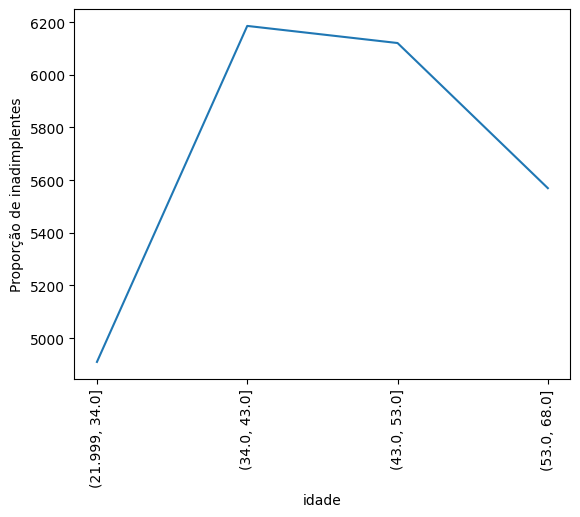

In [10]:
var = 'idade'
cat_srs, bins = pd.qcut(renda[var], 4, retbins=True)
g = renda.groupby(cat_srs)
biv = g['renda'].mean()

ax = biv.plot.line()
ax.set_ylabel("Proporção de inadimplentes")
ticks = plt.xticks(range(len(biv.index.values)), biv.index.values, rotation = 90)

C:\Users\Donegá\AppData\Local\Temp\ipykernel_19960\3475573977.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = renda.groupby(cat_srs)


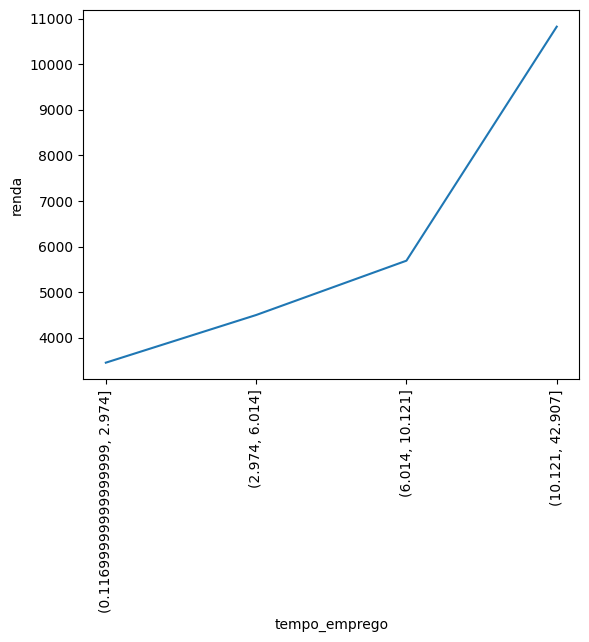

In [11]:
var = 'tempo_emprego'
cat_srs, bins = pd.qcut(renda[var], 4, retbins=True)
g = renda.groupby(cat_srs)
biv = g['renda'].mean()

ax = biv.plot.line()
ax.set_ylabel("renda")
ticks = plt.xticks(range(len(biv.index.values)), biv.index.values, rotation = 90)

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



Os dados já estão pré-selecionados, construídos e integrados, mas há dados faltantes que serão eliminados na próxima célula


In [13]:
metadata = pd.DataFrame(renda.dtypes, columns = ['tipo'])

metadata['n_categorias'] = 0

for var in metadata.index:
    metadata.loc[var,'n_categorias'] = len(renda.groupby([var]).size())
    
metadata

,tipo,n_categorias
Unnamed: 0,int64,15000
data_ref,object,15
id_cliente,int64,9845
sexo,object,2
posse_de_veiculo,bool,2
posse_de_imovel,bool,2
qtd_filhos,int64,8
tipo_renda,object,5
educacao,object,5
estado_civil,object,5


In [16]:
def convert_dummy(renda, feature,rank=0):
    pos = pd.get_dummies(renda[feature], prefix=feature)
    mode = renda[feature].value_counts().index[rank]
    biggest = feature + '_' + str(mode)
    pos.drop([biggest],axis=1,inplace=True)
    renda.drop([feature],axis=1,inplace=True)
    renda=renda.join(pos)
    return renda

In [17]:
for var in metadata[metadata['tipo'] == 'object'].index:
    renda = convert_dummy(renda, var)

In [18]:
renda

,Unnamed: 0,id_cliente,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,data_ref_2015-02-01,...,educacao_Superior incompleto,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Aluguel,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
0,0,15056,False,True,0,26,6.602740,1.0,8060.34,False,...,False,False,True,False,False,False,False,False,False,False
1,1,9968,True,True,0,28,7.183562,2.0,1852.15,False,...,False,False,False,False,False,False,False,False,False,False
2,2,4312,True,True,0,35,0.838356,2.0,2253.89,False,...,False,False,False,False,False,False,False,False,False,False
3,3,10639,False,True,1,30,4.846575,3.0,6600.77,False,...,False,False,False,False,False,False,False,False,False,False
4,4,7064,True,False,0,33,4.293151,1.0,6475.97,False,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,16006,False,True,0,48,13.887671,1.0,7990.58,False,...,False,False,True,False,False,False,False,False,False,False
14996,14996,3722,False,True,0,57,NaN,1.0,10093.45,False,...,False,False,True,False,False,False,False,False,False,False
14997,14997,6194,True,True,0,45,7.832877,2.0,604.82,False,...,False,False,False,False,False,False,False,False,False,False
14998,14998,4922,True,False,0,36,4.298630,2.0,3352.27,False,...,False,False,False,False,False,False,False,False,False,False


In [32]:
# Criando um objeto SimpleImputer para preencher os valores ausentes com a média
imputer = SimpleImputer(strategy='mean')

In [33]:
# Criando um pipeline com o imputer e o classificador RandomForestClassifier
pipeline = Pipeline(steps=[('imputer', imputer), ('clf', RandomForestClassifier(n_estimators=3))])

## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


- Selecionar a técnica de modelagem Utilizaremos a técnica de floresta aleatória (random forest), pois é uma técnica bastante versátil e robusta que captura bem padrões complexos nos dados, relativamente fácil de se usar e que costuma produzir excelentes resultados para uma classificação como estas. Vamos ver esse algoritmo em detalhes mais adiante no curso, mas pense nele por enquanto como uma regra complexa baseada nas variáveis explicativas que classifica o indivíduo como inadimplente ou não. Mais adiante no curso vamos extrair mais dessa técnica.
- Desenho do teste Antes de rodar o modelo precisamos construir um desenho do teste que será realizado. Para desenvolver um modelo como este, é considerado uma boa prática dividir a base em duas, uma chamada treinamento, onde o algoritmo 'aprende', e outra chamada teste, onde o algoritmo é avaliado. Essa prática fornece uma métrica de avaliação mais fidedigna do algoritmo, falaremos mais detalhes em lições futuras.
- Avaliação do modelo Faremos a avaliação do nosso modelo através do percentual de acerto, avaliando a classificação do modelo (inadimplente e não inadimplente) e comparando com o estado real armazenado na variável resposta (AtrasoRelevante2anos). Esse percentual de acerto é frequentemente chamado de acurácia (obs: nunca usar assertividade... assertivo não é aquele que acerta, e sim "adj.: em que o locutor declara algo, positivo ou negativo, do qual assume inteiramente a validade; declarativo." aCertivo está errado ;)


Dividindo a base em treino e teste

In [42]:
# Criar um objeto LabelEncoder
label_encoder = LabelEncoder()

# Converter os rótulos contínuos em classes discretas
y_train_discrete = label_encoder.fit_transform(y_train)

In [43]:
# Tirando a v. resposta da base de treinamento
x = renda.drop("renda",axis = 1)
y = renda["renda"]

# Tirando ID da base de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [44]:
x_train

,Unnamed: 0,id_cliente,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,data_ref_2015-02-01,data_ref_2015-03-01,...,educacao_Superior incompleto,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Aluguel,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
13979,13979,9485,True,False,0,35,6.263014,2.0,False,False,...,False,False,False,False,False,False,False,True,False,False
972,972,15186,True,True,1,45,9.454795,3.0,False,False,...,False,False,False,False,False,False,False,False,False,False
8884,8884,5069,True,False,0,30,5.717808,2.0,False,False,...,False,False,False,False,False,False,True,False,False,False
501,501,15508,False,False,2,37,3.624658,4.0,False,False,...,False,False,False,False,False,False,False,False,False,False
4801,4801,7285,False,True,1,37,6.046575,3.0,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4564,4564,7963,False,True,0,54,NaN,2.0,False,False,...,False,False,False,False,False,False,False,False,False,False
13346,13346,8825,True,True,1,31,13.471233,3.0,False,False,...,False,False,False,False,False,False,False,False,False,False
12471,12471,7546,True,True,0,47,1.515068,2.0,False,False,...,False,False,False,False,False,False,False,False,False,False
3388,3388,10022,False,False,2,43,21.610959,4.0,False,False,...,False,False,False,False,False,False,False,False,False,False


### Rodando o modelo


A função RandomForestClassifier gera a estrutura da floresta aleatória, e o parâmetro n_estimator define o número de árvores na floresta. Normalmente a acurácia do modelo tende a aumentar com o número de árvores, pelo menos até um certo limite - e aumenta também o recurso computacional demandado. Você pode alterar esse parâmetro e verificar se a acurácia do seu modelo melhora - não recomendamos valores muito altos. Vá alterando aos poucos e percebendo como o tempo aumenta com os seus recursos. Não é necessário ir muito além de umas 100 árvores.


In [54]:
# preenchendo os valores ausentes com a média das colunas
imputer = SimpleImputer(strategy='mean')
renda_filled = imputer.fit_transform(renda)
renda_filled = pd.DataFrame(renda_filled, columns=renda.columns)  

# Dividindo os dados em conjunto de treinamento e teste
X = renda_filled.drop(columns=['renda'])
y = renda_filled['renda']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinando o modelo de regressão de Random Forest
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

# Fazendo previsões
y_pred = regressor.predict(X_test)

# Avaliando o modelo
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 28625867.670259725


## Etapa 5 Crisp-DM: Avaliação dos resultados


Verificamos no  gráfico de dispersão que o modelo está tendendo a fazer previsões mais consistentes dentro de uma faixa específica entre entre 0 e 20.000 reais


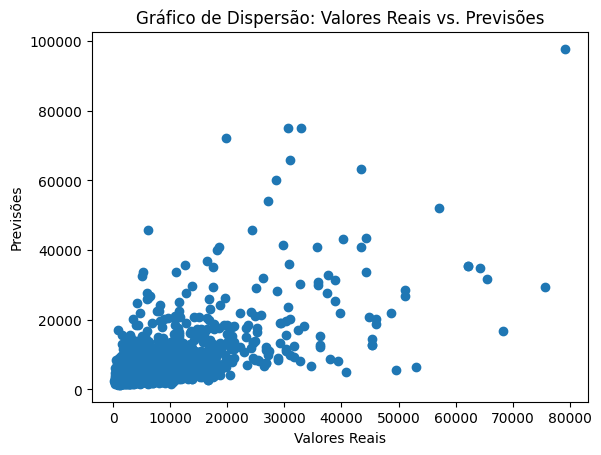

In [55]:
plt.scatter(y_test, y_pred)
plt.xlabel("Valores Reais")
plt.ylabel("Previsões")
plt.title("Gráfico de Dispersão: Valores Reais vs. Previsões")
plt.show()

## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.